In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
# Define the sample dataset
data = {
    'customer_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'transaction_date': ['2022-01-01', '2022-02-15', '2022-04-20', '2022-01-05', '2022-03-10', '2022-02-01', '2022-05-15', '2022-01-10', '2022-04-01', '2022-03-20', '2022-06-01'],
    'purchase_amount': [100.00, 50.00, 200.00, 150.00, 75.00, 250.00, 100.00, 50.00, 25.00, 300.00, 200.00],
    'transaction_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

In [15]:
# Load the data from the CSV file
#df = pd.read_csv('customer_data.csv')

# Convert the transaction date column to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [16]:
df.head()

,customer_id,transaction_date,purchase_amount,transaction_id
0,1,2022-01-01,100.0,1
1,1,2022-02-15,50.0,2
2,1,2022-04-20,200.0,3
3,2,2022-01-05,150.0,4
4,2,2022-03-10,75.0,5


In [17]:
# Calculate recency by finding the most recent transaction date for each customer
df_recency = df.groupby('customer_id')['transaction_date'].max().reset_index()
df_recency = df_recency.rename(columns={'transaction_date': 'recency'})

In [18]:
# Calculate recency score using qcut
recency_scores = pd.qcut(df_recency['recency'], q=5, labels=False, duplicates='drop')


In [19]:
# Calculate frequency by counting the number of transactions for each customer
df_frequency = df.groupby('customer_id').agg({'transaction_id': 'nunique'})
df_frequency = df_frequency.rename(columns={'transaction_id': 'frequency'})


In [20]:
# Calculate frequency score using qcut with duplicates='drop'
frequency_scores = pd.qcut(df_frequency['frequency'], q=5, labels=False, duplicates='drop')


In [21]:
# Calculate monetary value by summing the purchase amounts for each customer
df_monetary = df.groupby('customer_id')['purchase_amount'].sum().reset_index()
df_monetary = df_monetary.rename(columns={'purchase_amount': 'monetary'})


In [22]:
# Calculate monetary score using qcut
monetary_scores = pd.qcut(df_monetary['monetary'], q=5, labels=False, duplicates='drop')


In [23]:
# Combine the recency, frequency, and monetary scores into a single DataFrame
rfm_scores = pd.DataFrame({
    'customer_id': df_recency['customer_id'],
    'recency_score': recency_scores,
    'frequency_score': frequency_scores,
    'monetary_score': monetary_scores
})


In [24]:
# Calculate the overall RFM score by summing the recency, frequency, and monetary scores
rfm_scores['RFM_Score'] = rfm_scores['recency_score'] + rfm_scores['frequency_score'] + rfm_scores['monetary_score']


In [28]:
# Segment customers based on their RFM scores
rfm_df = rfm_scores[['customer_id', 'RFM_Score']].copy()
rfm_df['Customer_segment'] = np.where(rfm_df['RFM_Score'] > 4.5, 'Top Customers',
                                      (np.where(rfm_df['RFM_Score'] > 4, 'High value Customer',
                                                (np.where(rfm_df['RFM_Score'] > 3, 'Medium Value Customer',
                                                          (np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers')))))))

In [30]:
print(rfm_df)

   customer_id  RFM_Score     Customer_segment
0          1.0        NaN       Lost Customers
1          2.0        2.0  Low Value Customers
2          3.0        5.0        Top Customers
3          4.0        1.0       Lost Customers
4          5.0        8.0        Top Customers
5          NaN        NaN       Lost Customers


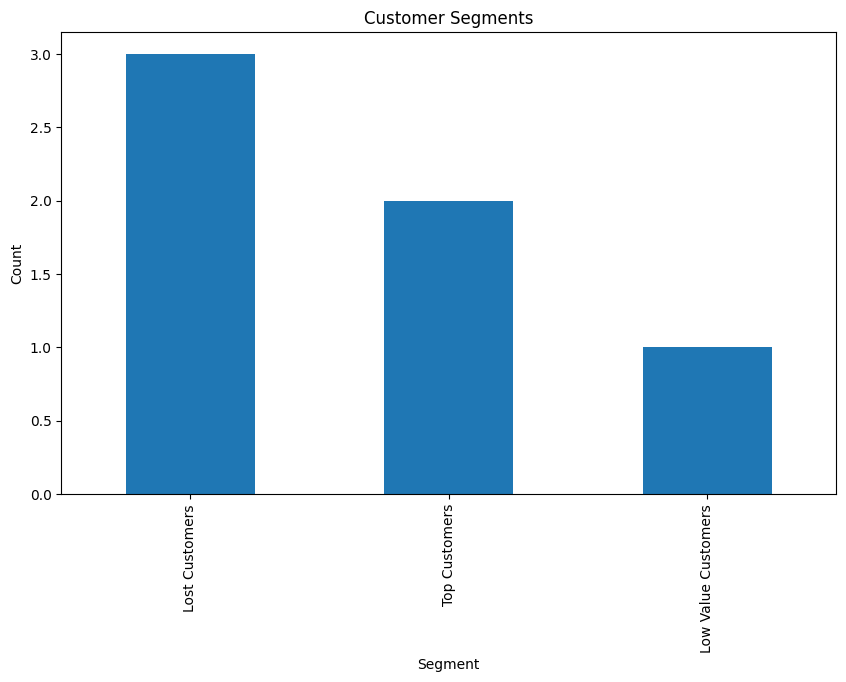

In [29]:
# Create a bar chart to visualize the customer segments
plt.figure(figsize=(10, 6))
rfm_df['Customer_segment'].value_counts().plot(kind='bar')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

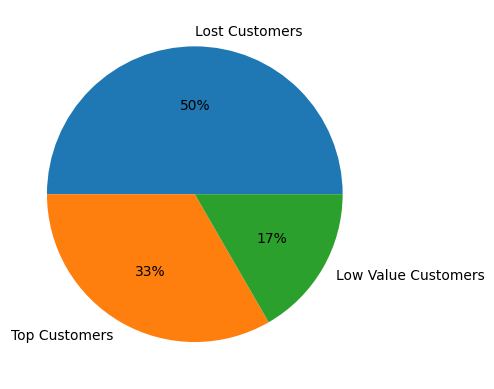

In [32]:
# Visualize the customer segments
plt.pie(rfm_df.Customer_segment.value_counts(), labels=rfm_df.Customer_segment.value_counts().index, autopct='%0.00f%%')
plt.show()